In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

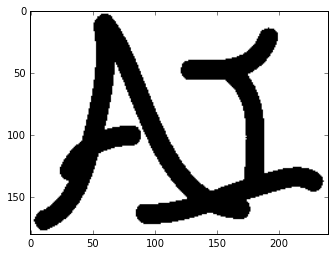

In [3]:
I=Image.open("in.png")
plt.imshow(I)
plt.show()

In [5]:
def Energy(alpha,beta,gamma):
    
    def valid_pixel(i,j,shape):
        return i>=0 and j>=0 and i<shape[0] and j<shape[1]
    
    def old_energy(x,y,i,j):
        old_value=x[i,j]
        new_value=old_value
        E=-alpha*new_value-beta*new_value*y[i,j]
        
        corner=[(1,0),(0,1),(-1,0),(0,-1)]
        
        pixel_value=[x[i+di,j+dj] for di,dj in corner if valid_pixel(i+di,j+dj,x.shape)]
        
        E=E-np.sum(pixel_value)*new_value
        
        return E
    
    
    def new_energy(x,y,i,j):
        old_value=x[i,j]
        new_value=-old_value
        E=-alpha*new_value-beta*new_value*y[i,j]
        
        corner=[(1,0),(0,1),(-1,0),(0,-1)]
        
        pixel_value=[x[i+di,j+dj] for di,dj in corner if valid_pixel(i+di,j+dj,x.shape)]
        
        E=E-np.sum(pixel_value)*new_value
        return old_value,new_value,E
    
    return old_energy,new_energy
    
    

In [28]:
def temperature(k,kmax):
    return 1.0/500.0*(1.0/k-1.0/kmax)

def prob(E1,E2,temp):
    return 1 if E1>E2 else np.exp(-(E2-E1)/temp)

In [29]:
def value_convert(x,translate):
    b=np.array(x)
    return np.vectorize(lambda x: translate[x])(b)

def flip_sign(x,density):
    a,b=len(x),np.array(x)
    for i in range(a): 
        p=np.random.rand()
        if  p < density:
            b[i]=-b[i]
    return b

In [30]:
old,new=Energy(0,1e-3,2.3e-3)
I_value=I.getdata()
I_change=value_convert(I_value,{0:-1,255:1})
I_flip=flip_sign(I_change,0.1)
y=I_flip.reshape(np.array(I).shape)
x=y

In [37]:
kmax=10
E_collect=[]
for k in range(1,kmax):
    E_value=[]
    t=temperature(k,kmax)
    accept,reject=0,0
    for ndx in np.ndindex(x.shape):
        old_energy=old(x,y,ndx[0],ndx[1])
        
        E_best=old_energy
        
        old_val,new_val,new_energy=new(x,y,ndx[0],ndx[1])
        
        p,q=prob(old_energy,new_energy,t),np.random.rand()
        
        if p>q:
            accept+=1
            old_energy,x[ndx]=new_energy,new_val
            if new_energy<E_best:
                E_best=new_energy
            
        else:
            reject+=1
            old_energy,x[ndx]=old_energy,old_val
        E_value.append(E_best)
    E_collect.append(np.sum(E_value))
            
    print 'iteration=%d,temperature=%f,accept new=%d,reject new=%d' %(k,t,accept,reject) 

iteration=1,temperature=0.001800,accept new=235,reject new=42965
iteration=2,temperature=0.000800,accept new=67,reject new=43133
iteration=3,temperature=0.000467,accept new=5,reject new=43195
iteration=4,temperature=0.000300,accept new=0,reject new=43200
iteration=5,temperature=0.000200,accept new=0,reject new=43200
iteration=6,temperature=0.000133,accept new=0,reject new=43200
iteration=7,temperature=0.000086,accept new=0,reject new=43200
iteration=8,temperature=0.000050,accept new=0,reject new=43200
iteration=9,temperature=0.000022,accept new=0,reject new=43200


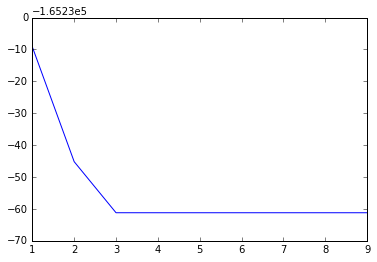

In [38]:
plt.plot(np.arange(1,kmax),E_collect)
plt.show()

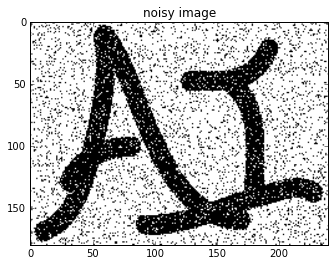

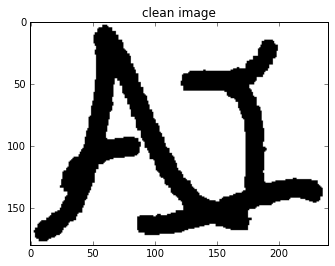

In [39]:
I_value=I.getdata()
I_change=value_convert(I_value,{0:-1,255:1})
I_flip=flip_sign(I_change,0.1)
plt.imshow(I_flip.reshape(np.array(I).shape),plt.cm.gray)
plt.title('noisy image')
plt.show()

plt.imshow(x,plt.cm.gray)
plt.title('clean image')

plt.show()